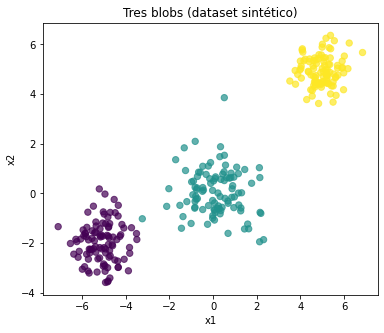

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial import distance
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs
from sklearn import metrics
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


# Crear 3 grupos (blobs)
X, y = make_blobs(
    n_samples=300,           # total de puntos
    centers=[(-5, -2), (0, 0), (5, 5)],  # coordenadas de los centros
    cluster_std=[0.8, 1.0, 0.6],         # dispersión de cada grupo
    random_state=42
)

# Visualizar los datos reales
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", alpha=0.7, s=40)
plt.title("Tres blobs (dataset sintético)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [11]:
X = pd.DataFrame(X, columns=["x1", "x2"])
fields = ["x1", "x2"]

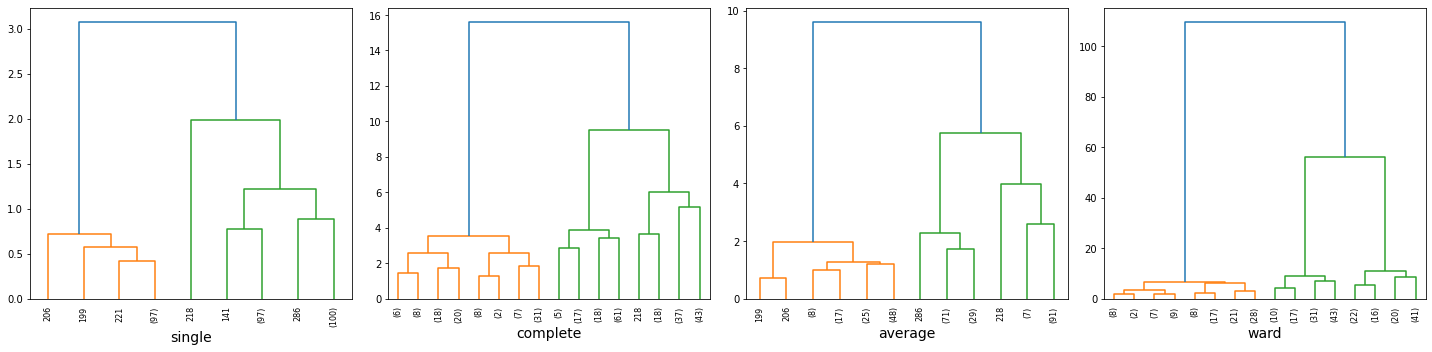

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ms = ['single', 'complete', 'average', 'ward']
dms = []
Zs = []
for m, ax in zip(ms, axs) :
    dm = pdist(X[fields], metric='euclidean') #single, complete, average, and ward
    dms.append(dm)
    Z = linkage(dm, method=m)#single, complete, average, and ward
    d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=8, leaf_rotation=90, ax=ax, truncate_mode="level", p=3)

    ax.set_xlabel(m, fontsize=14)
    Zs.append(Z)


plt.tight_layout()
plt.show()


Silouette score para  single = 0.6935552360795079


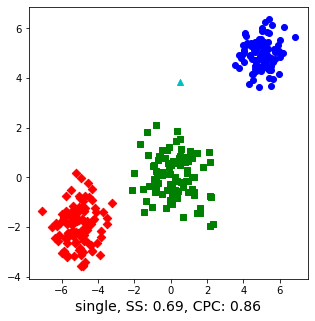

Silouette score para  complete = 0.603884606262996


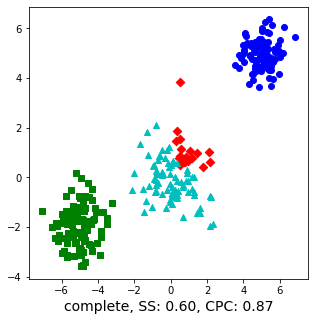

Silouette score para  average = 0.6935552360795079


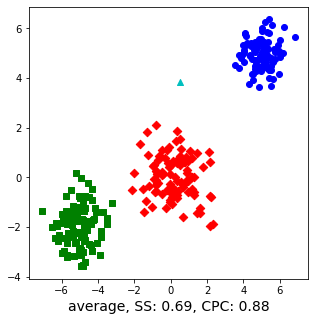

Silouette score para  ward = 0.6248068368794593


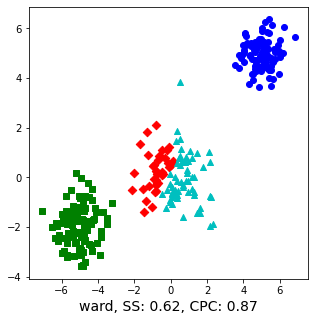

In [13]:
cgrupos = 4
ms = ['single', 'complete', 'average', 'ward']
for m, Z in zip(ms, Zs):
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=X.index)
    X["Cluster"] = memb

    ss = metrics.silhouette_score(X[fields], labels=memb, metric='euclidean')
    print("Silouette score para ", m, "=", ss)

    uet = np.unique(X["Cluster"])
  
    fig, ax = plt.subplots(figsize=(5, 5))
    i = 0
    for e in uet:
        x = X[X["Cluster"]==e][fields[0]]
        y = X[X["Cluster"]==e][fields[1]]
        for index, row in X[X["Cluster"]==e].iterrows():
            ax.scatter(row[fields[0]],row[fields[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        cpc, cp = cophenet(linkage(dm, method=m), dm)
        ax.set_xlabel(m+", SS: "+"{:2.2f}".format(ss)+", CPC: "+"{:2.2f}".format(cpc), fontsize=14)       
        i+=1
        #plt.scatter(x, y, marker=markers[e%len(markers)], color=colors[e%len(colors)], label='Group'+str(e))
    #plt.legend()
    plt.show()


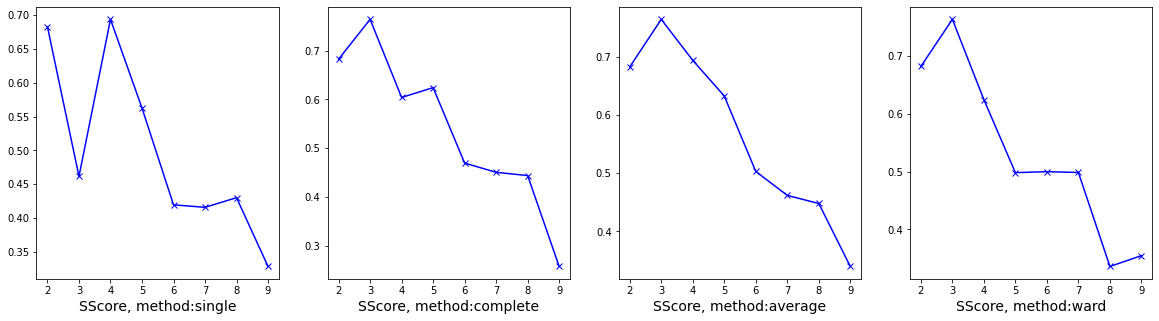

El maximo valor esta en  complete 3


In [14]:
groups = range(2,10,1)
ms = ['single', 'complete', 'average', 'ward']
fig, axs = plt.subplots(1, len(ms), figsize=(20, 5))


results = []
ssmax = ('', 0, None, None, -1)
sscores = []

for m, mv, ax in zip(ms, range(0,len(ms)), axs):
    sscores = []
    for i in groups:
        #pdist calcula la matriz de distancias
        dm = pdist(X[fields], metric='euclidean') #single, complete, average, and ward
        #linkage calcula el linkage, Z es una matriz donde cada fila es un enlace entre dos grupos
        Z = linkage(dm, method=m)#single, complete, average, and ward
        # Seleciono cantidad de grupos...es i
        memb = fcluster(Z, i, criterion='maxclust')
        X["cluster_"+m+"_"+str(i)] = memb
        # Calculo el silhouette score
        ss = metrics.silhouette_score(X[fields], labels=memb, metric='euclidean')
        val = (m, i, dm, Z, ss)
        results.append(val)
        if val[4]>ssmax[4]:
            ssmax = val
        sscores.append(ss)
    
    ax.plot(groups,sscores,'bx-')
    ax.set_xlabel("SScore, method:{}".format(m), fontsize=14)
        
plt.show()


print("El maximo valor esta en ", ssmax[0], ssmax[1])

El Silhouette Score es una medida de cercanía de los puntos al cluster donde quedaron agrupados y en comparación con otros cluster. Va entre -1 y 1 y mientras mayor sea el valor puede considerarse un mejor agrupamiento.

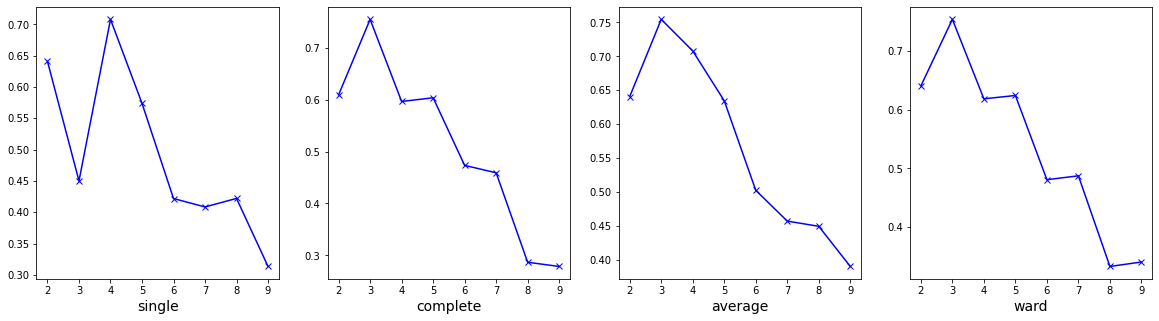

El maximo valor esta en  complete 3 y es de  0.754508214230438


In [15]:
def distancia_del_rey(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return max(abs(x1 - x2), abs(y1 - y2))

ms = ['single', 'complete', 'average', 'ward']
groups = range(2,10,1)
fig, axs = plt.subplots(1, len(ms), figsize=(20, 5))


results = []
ssmax = ('', 0, None, None, -1)
sscores = []
Zs = []
for m, mv, ax in zip(ms, range(0,len(ms)), axs):
    sscores = []
    Z = linkage(dm, method=m)#single, complete, average, and ward
    for i in groups:
        dm = pdist(X[fields], metric=distancia_del_rey) #single, complete, average, and ward
        memb = fcluster(Z, i, criterion='maxclust')
        X["cluster_"+m+"_"+str(i)] = memb
        ss = metrics.silhouette_score(X[fields], labels=memb, metric=distancia_del_rey)
        val = (m, i, dm, Z, ss)
        results.append(val)
        if val[4]>ssmax[4]:
            ssmax = val
        sscores.append(ss)
    Zs.append(Z)
    
    ax.plot(groups,sscores,'bx-')
    ax.set_xlabel(m, fontsize=14)
        
plt.show()

print("El maximo valor esta en ", ssmax[0], ssmax[1], "y es de ", ssmax[4])

Si establecemos 3 la cantidad de clusters si podemos mediante Silhouette quedarnos con el mejor agrupamiento

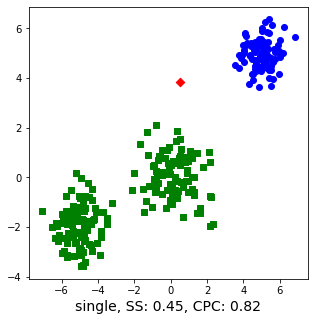

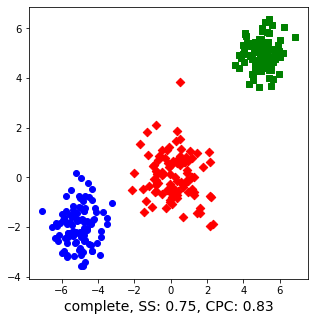

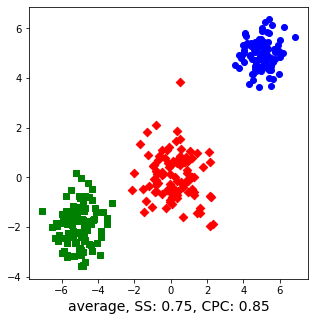

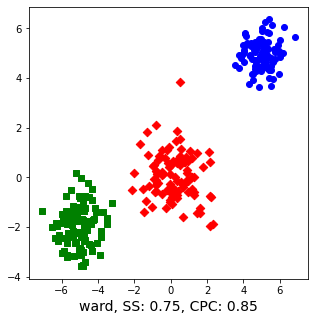

In [17]:
cgrupos = 3
ms = ['single', 'complete', 'average', 'ward']
for m, Z in zip(ms, Zs):
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=X.index)
    X["Cluster"] = memb

    ss = metrics.silhouette_score(X[fields], labels=memb, metric=distancia_del_rey)
    #print("Silouette score para ", m, "=", ss)

    uet = np.unique(X["Cluster"])
    fig, ax = plt.subplots(figsize=(5, 5))
    i = 0
    for e in uet:
        x = X[X["Cluster"]==e][fields[0]]
        y = X[X["Cluster"]==e][fields[1]]
        for index, row in X[X["Cluster"]==e].iterrows():
            ax.scatter(row[fields[0]],row[fields[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        
        cpc, cp = cophenet(linkage(dm, method=m), dm)

        
        ax.set_xlabel(m+", SS: "+"{:2.2f}".format(ss)+", CPC: "+"{:2.2f}".format(cpc), fontsize=14)    
        i+=1
        #plt.scatter(x, y, marker=markers[e%len(markers)], color=colors[e%len(colors)], label='Group'+str(e))
    #plt.legend()
    plt.show()

In [19]:
from scipy.spatial import distance

# Obtén la lista de todas las métricas de distancia disponibles
all_distance_metrics = distance._METRICS.keys()

# Imprime la lista de métricas de distancia
for metric in all_distance_metrics:
    print(metric)

    

braycurtis
canberra
chebyshev
cityblock
correlation
cosine
dice
euclidean
hamming
jaccard
jensenshannon
kulczynski1
mahalanobis
minkowski
rogerstanimoto
russellrao
seuclidean
sokalmichener
sokalsneath
sqeuclidean
yule


--------